# Exploratory data analysis 

## Data

In [43]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohamedgobara/multi-class-knee-osteoporosis-x-ray-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/gideonbonwitt/.cache/kagglehub/datasets/mohamedgobara/multi-class-knee-osteoporosis-x-ray-dataset/versions/1


In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

## Genearal information

In [45]:
import os

# Define the folder paths
base_path = "/Users/gideonbonwitt/.cache/kagglehub/datasets/mohamedgobara/multi-class-knee-osteoporosis-x-ray-dataset/versions/1/OS Collected Data"
classes = ["Normal", "Osteopenia", "Osteoporosis"]

# Count images in each class
for cls in classes:
    folder_path = os.path.join(base_path, cls)
    num_images = len(os.listdir(folder_path))
    print(f"{cls}: {num_images} images")

Normal: 780 images
Osteopenia: 374 images
Osteoporosis: 793 images


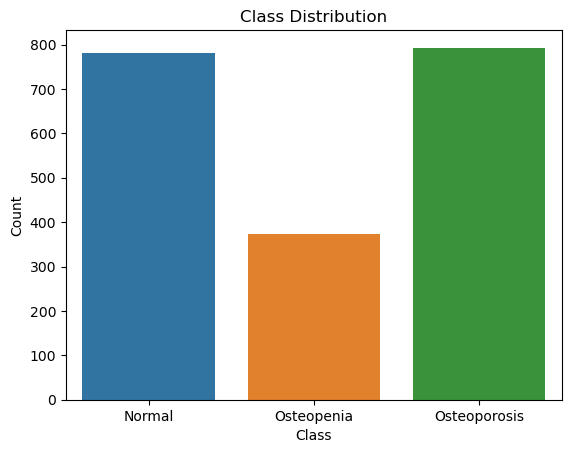

In [46]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for visualization
data = {"Class": [], "Count": []}
for cls in classes:
    folder_path = os.path.join(base_path, cls)
    num_images = len(os.listdir(folder_path))
    data["Class"].append(cls)
    data["Count"].append(num_images)

df = pd.DataFrame(data)

# Plot
sns.barplot(data=df, x="Class", y="Count")
plt.title("Class Distribution")
plt.show()

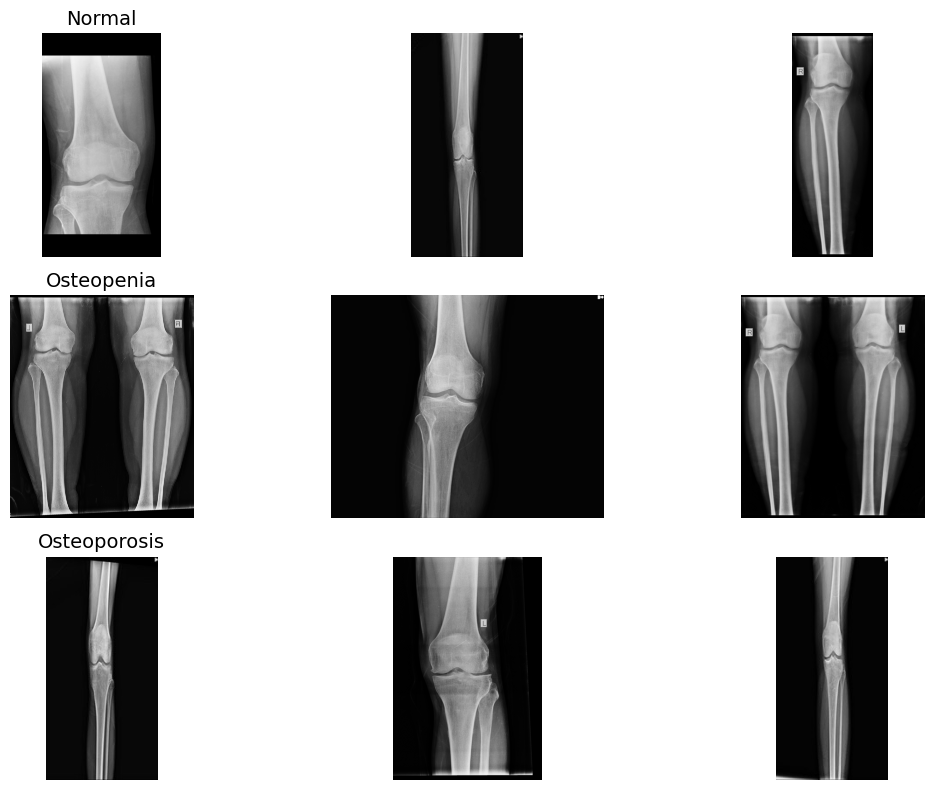

In [48]:
# Display random sample images
fig, axes = plt.subplots(len(classes), 3, figsize=(12, 8))
for i, cls in enumerate(classes):
    folder_path = os.path.join(base_path, cls)
    sample_imgs = random.sample(os.listdir(folder_path), 3)
    for j, img_name in enumerate(sample_imgs):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)
        axes[i, j].imshow(img, cmap="gray")
        axes[i, j].axis("off")
        if j == 0:
            axes[i, j].set_title(cls, fontsize=14)
plt.tight_layout()
plt.show()

## Image information

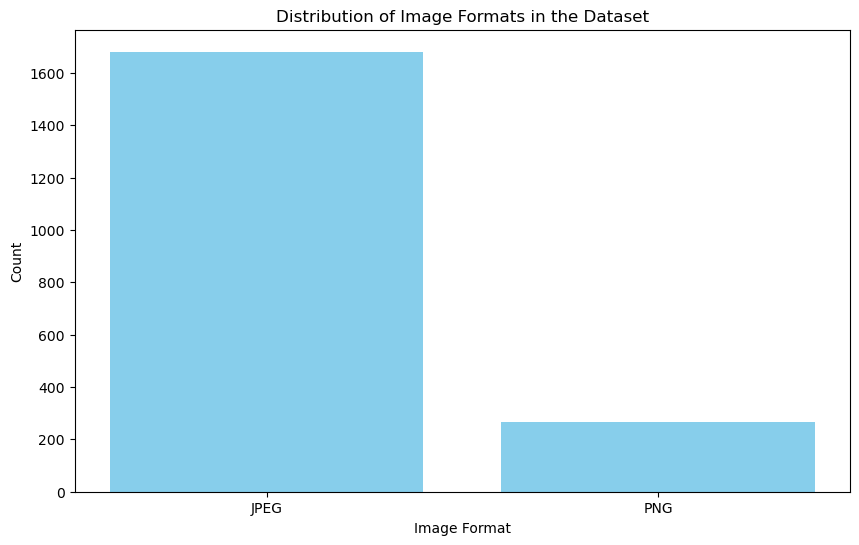

In [52]:
from PIL import Image
import os
import matplotlib.pyplot as plt

# Define the base path to your dataset
base_path = "/Users/gideonbonwitt/.cache/kagglehub/datasets/mohamedgobara/multi-class-knee-osteoporosis-x-ray-dataset/versions/1/OS Collected Data"

# Initialize a dictionary to store image formats
image_formats = {}

# Loop through each category folder (Normal, Osteopenia, Osteoporosis)
for category in ["Normal", "Osteopenia", "Osteoporosis"]:
    category_path = os.path.join(base_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            with Image.open(img_path) as img:
                format_type = img.format
                if format_type not in image_formats:
                    image_formats[format_type] = 0
                image_formats[format_type] += 1
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

# Visualize the image formats in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(image_formats.keys(), image_formats.values(), color='skyblue')
plt.title("Distribution of Image Formats in the Dataset")
plt.xlabel("Image Format")
plt.ylabel("Count")
plt.show()


             Width       Height
count  1947.000000  1947.000000
mean   1302.438624  1565.000514
std    1458.419141  1400.752477
min     128.000000   256.000000
25%     128.000000   256.000000
50%     556.000000  1024.000000
75%    2430.000000  2656.000000
max    5320.000000  5320.000000


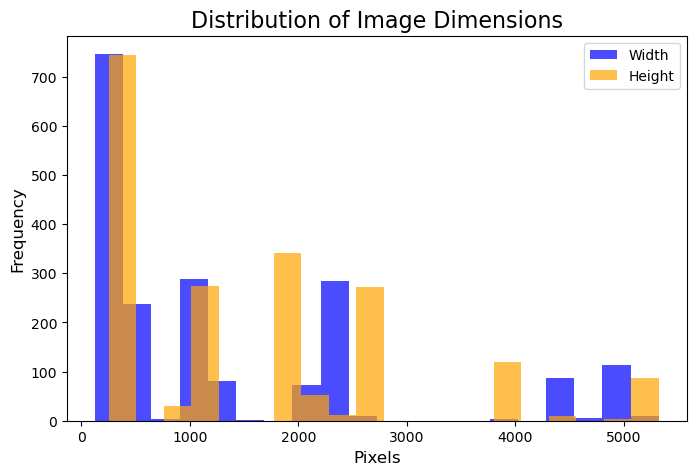

In [18]:
# Get image dimensions for all images
dimensions = []
for cls in classes:
    folder_path = os.path.join(base_path, cls)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)
        dimensions.append(img.size)

# Convert to DataFrame for visualization
df_dims = pd.DataFrame(dimensions, columns=["Width", "Height"])
print(df_dims.describe())

# Plot
plt.figure(figsize=(8, 5))
plt.hist(df_dims["Width"], bins=20, alpha=0.7, label="Width", color="blue")
plt.hist(df_dims["Height"], bins=20, alpha=0.7, label="Height", color="orange")
plt.title("Distribution of Image Dimensions", fontsize=16)
plt.xlabel("Pixels", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.show()

In [20]:
corrupt_images = []

for cls in classes:
    folder_path = os.path.join(base_path, cls)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = Image.open(img_path)
            img.verify()  # Verify if the image can be opened
        except (IOError, SyntaxError) as e:
            corrupt_images.append(img_path)

print(f"Number of corrupt images: {len(corrupt_images)}")
if corrupt_images:
    print("List of corrupt images:")
    for img in corrupt_images:
        print(f" - {img}")

Number of corrupt images: 0


In [23]:
color_modes = {"Grayscale": 0, "RGB": 0}

for cls in classes:
    folder_path = os.path.join(base_path, cls)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)
        if img.mode == "RGB":
            color_modes["RGB"] += 1
        elif img.mode == "L":  # L is grayscale
            color_modes["Grayscale"] += 1

print("Color Modes Distribution:")
for mode, count in color_modes.items():
    print(f" - {mode}: {count} images")

Color Modes Distribution:
 - Grayscale: 477 images
 - RGB: 1470 images


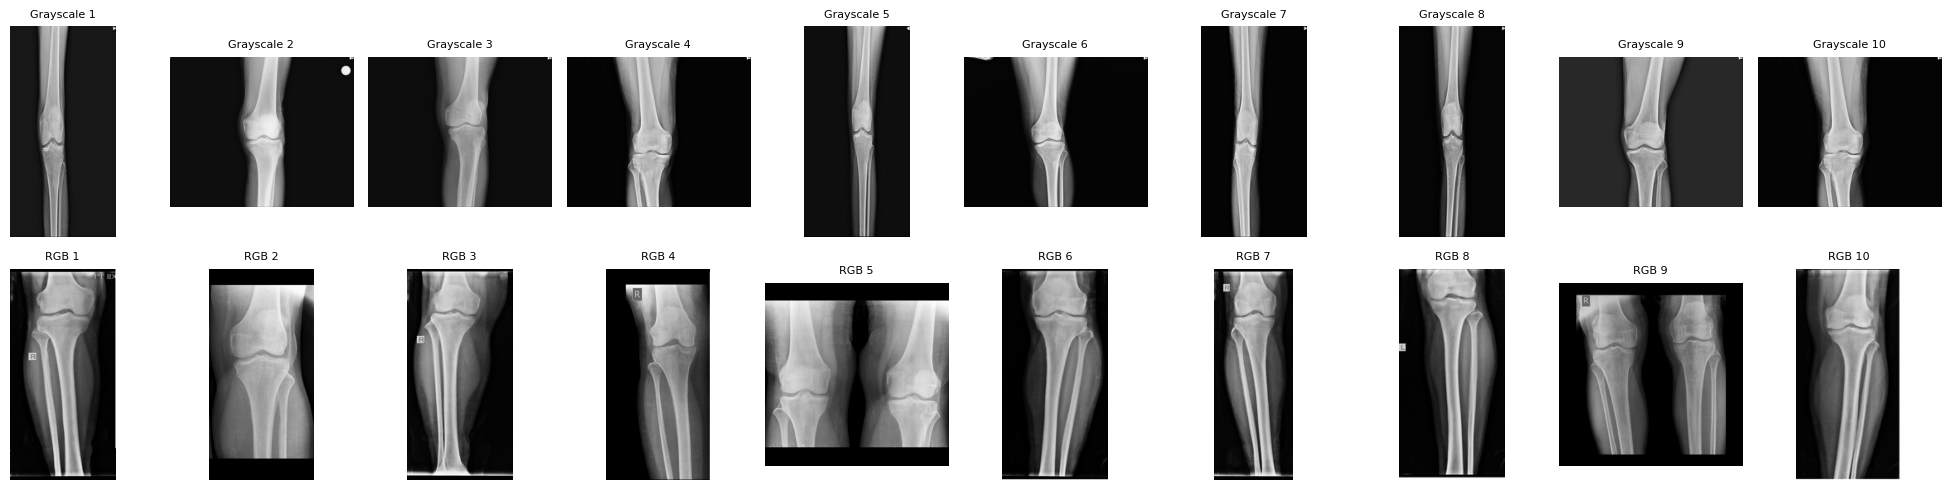

In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt

# Define the path to your dataset
base_path = "/Users/gideonbonwitt/.cache/kagglehub/datasets/mohamedgobara/multi-class-knee-osteoporosis-x-ray-dataset/versions/1/OS Collected Data"
classes = ["Normal", "Osteopenia", "Osteoporosis"]

# Collect grayscale and RGB images
grayscale_images = []
rgb_images = []

for cls in classes:
    folder_path = os.path.join(base_path, cls)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)
        if img.mode == "L" and len(grayscale_images) < 10:  # Grayscale images
            grayscale_images.append(img)
        elif img.mode == "RGB" and len(rgb_images) < 10:  # RGB images
            rgb_images.append(img)

        # Stop collecting if we have 10 of each
        if len(grayscale_images) >= 10 and len(rgb_images) >= 10:
            break

# Plot 10 grayscale and 10 RGB images side by side
fig, axes = plt.subplots(2, 10, figsize=(20, 5))

for i, (gray_img, rgb_img) in enumerate(zip(grayscale_images, rgb_images)):
    # Grayscale images
    axes[0, i].imshow(gray_img, cmap="gray")
    axes[0, i].axis("off")
    axes[0, i].set_title(f"Grayscale {i+1}", fontsize=8)
    
    # RGB images
    axes[1, i].imshow(rgb_img)
    axes[1, i].axis("off")
    axes[1, i].set_title(f"RGB {i+1}", fontsize=8)

plt.tight_layout()
plt.show()

## Analyze Bone Characteristics

Edge Detection
Highlight structural differences between Normal, Osteopenia, and Osteoporosis bones using edge detection techniques.

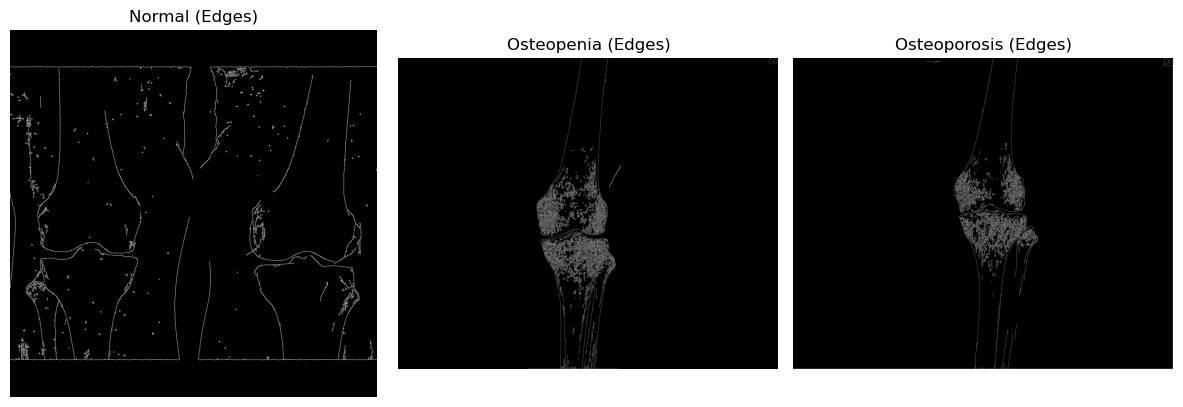

In [21]:
import cv2
import numpy as np

# Apply edge detection
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, cls in enumerate(["Normal", "Osteopenia", "Osteoporosis"]):
    folder_path = os.path.join(base_path, cls)
    img_path = os.path.join(folder_path, os.listdir(folder_path)[4])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    edges = cv2.Canny(img, 50, 150)  # Canny edge detection
    axes[i].imshow(edges, cmap="gray")
    axes[i].set_title(f"{cls} (Edges)", fontsize=12)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

Use texture analysis (Local Binary Patterns) to understand the differences in texture between normal and abnormal bones.

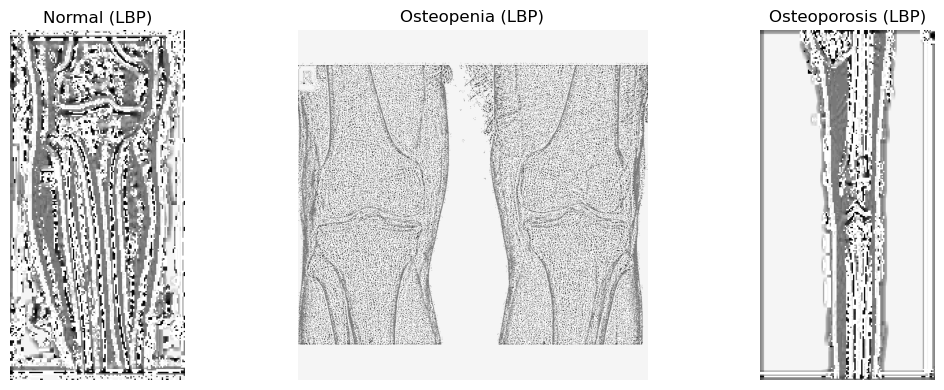

In [39]:
import cv2
from skimage.feature import local_binary_pattern

# Compute Local Binary Pattern (LBP)
radius = 3
n_points = 8 * radius

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, cls in enumerate(["Normal", "Osteopenia", "Osteoporosis"]):
    folder_path = os.path.join(base_path, cls)
    img_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    lbp = local_binary_pattern(img, n_points, radius, method="uniform")
    axes[i].imshow(lbp, cmap="gray")
    axes[i].set_title(f"{cls} (LBP)", fontsize=12)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

Visualize differences in bone density by normalizing pixel intensities.


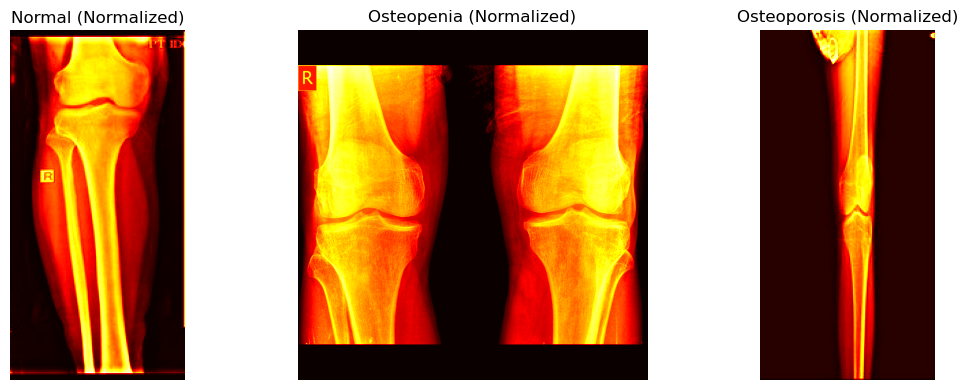

In [31]:
# Normalize pixel values and overlay images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, cls in enumerate(["Normal", "Osteopenia", "Osteoporosis"]):
    folder_path = os.path.join(base_path, cls)
    img_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    img = Image.open(img_path).convert("L")
    img_normalized = np.array(img) / 255.0  # Normalize to [0, 1]
    axes[i].imshow(img_normalized, cmap="hot")
    axes[i].set_title(f"{cls} (Normalized)", fontsize=12)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

## Duplicate Analysis

Compare Image Hashes
Use the Perceptual Hashing (pHash) algorithm to identify duplicates, even if the images are resized or slightly modified.

In [49]:
# !pip install imagehash

Category-wise Statistics:
Category: Normal
  Duplicates: 493
  Unique Images: 287
Category: Osteopenia
  Duplicates: 140
  Unique Images: 234
Category: Osteoporosis
  Duplicates: 588
  Unique Images: 205

Duplicate Distribution:
  350 images have 1 duplicates.
  22 images have 2 duplicates.
  165 images have 3 duplicates.
  54 images have 4 duplicates.
  3 images have 5 duplicates.
  3 images have 7 duplicates.
  1 images have 8 duplicates.
  8 images have 9 duplicates.


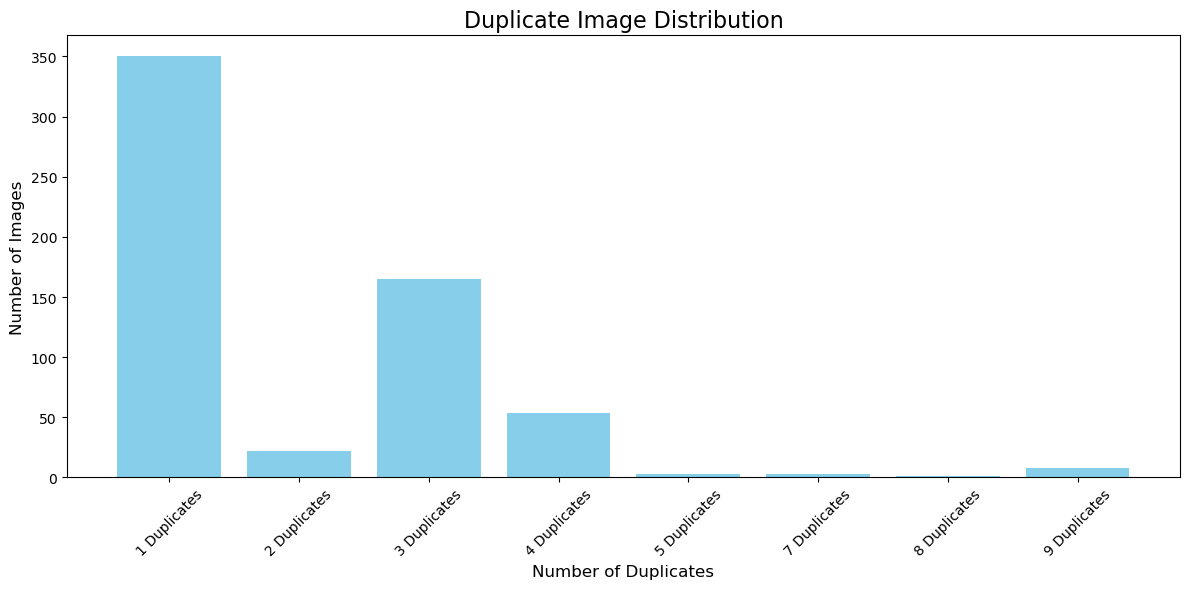


Displaying first 5 duplicate pairs:


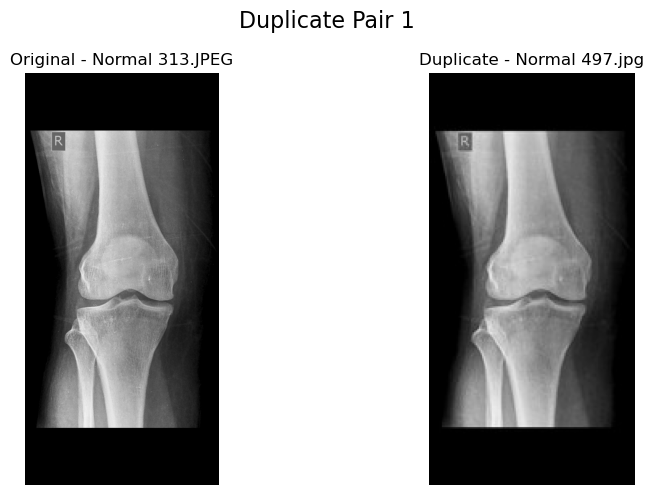

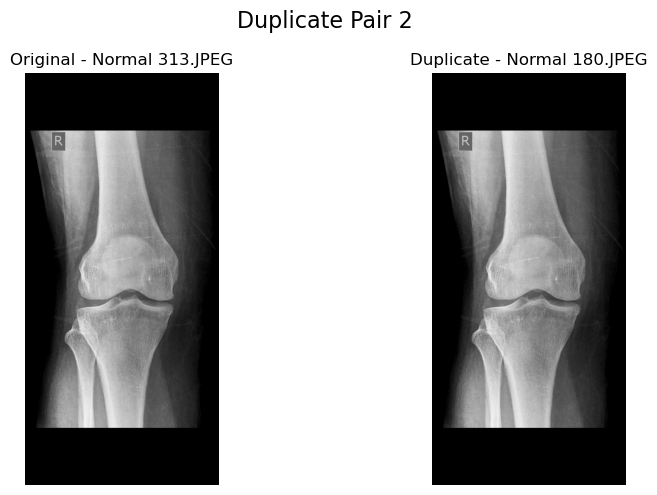

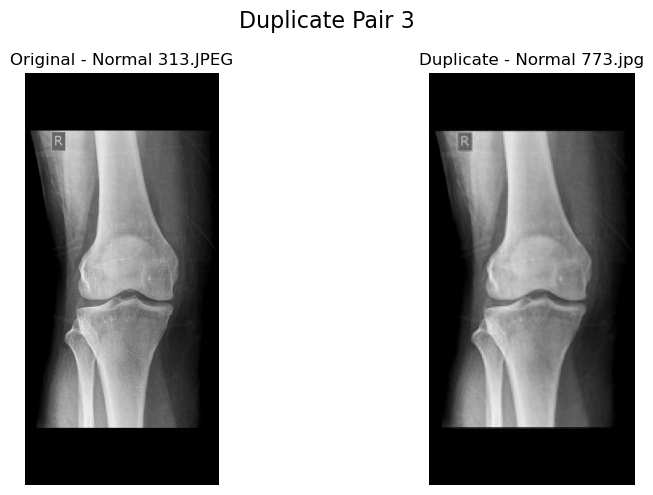

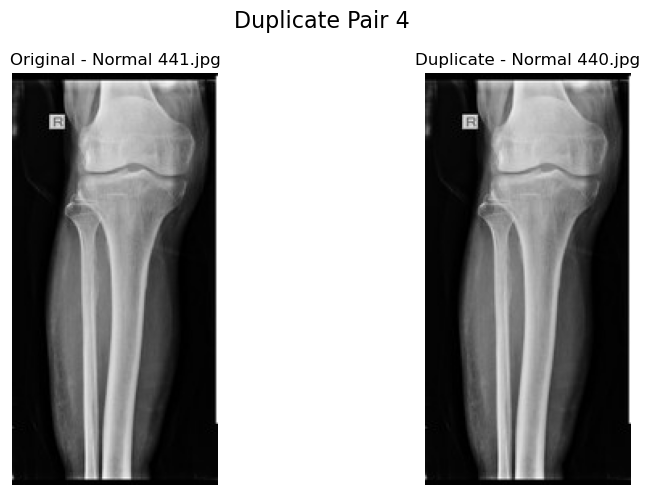

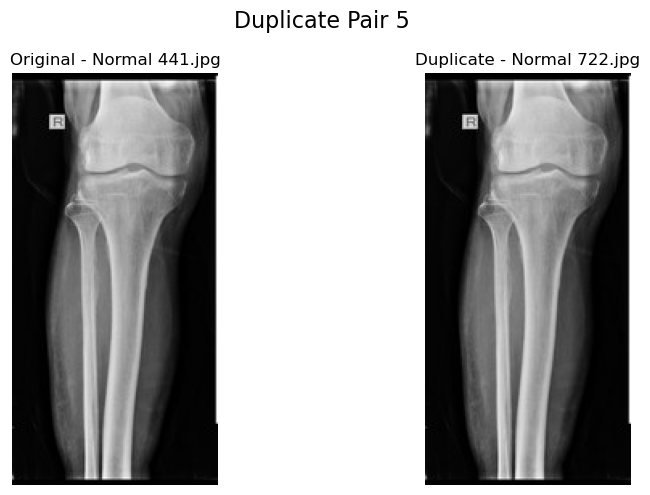

In [11]:
import imagehash
from PIL import Image
import os
import matplotlib.pyplot as plt
from collections import defaultdict

# Base path to dataset
base_path = "/Users/gideonbonwitt/.cache/kagglehub/datasets/mohamedgobara/multi-class-knee-osteoporosis-x-ray-dataset/versions/1/OS Collected Data"

# Categories to process
categories = ["Normal", "Osteopenia", "Osteoporosis"]

# Compute hashes and find duplicates
hashes = {}
duplicates = defaultdict(list)  # Dictionary to store duplicates by their original hash
category_stats = {cls: {"duplicates": 0, "unique": 0} for cls in categories}

for cls in categories:
    folder_path = os.path.join(base_path, cls)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = Image.open(img_path)
            img_hash = imagehash.phash(img)  # Compute perceptual hash
            if img_hash in hashes:
                duplicates[img_hash].append(img_path)  # Group duplicates by hash
                category_stats[cls]["duplicates"] += 1
            else:
                hashes[img_hash] = img_path
                category_stats[cls]["unique"] += 1
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

# Output the statistics for each category
print("Category-wise Statistics:")
for cls, stats in category_stats.items():
    print(f"Category: {cls}")
    print(f"  Duplicates: {stats['duplicates']}")
    print(f"  Unique Images: {stats['unique']}")

# Analyze duplicate counts for detailed distribution (1, 2, 3, ... duplicates)
duplicate_distribution = defaultdict(int)
for original_img, duplicate_imgs in duplicates.items():
    duplicate_distribution[len(duplicate_imgs)] += 1

# Print duplicate distribution
print("\nDuplicate Distribution:")
for num_duplicates, num_images in sorted(duplicate_distribution.items()):
    print(f"  {num_images} images have {num_duplicates} duplicates.")

# Visualize the distribution as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(
    [f"{k} Duplicates" for k in sorted(duplicate_distribution.keys())],
    [duplicate_distribution[k] for k in sorted(duplicate_distribution.keys())],
    color="skyblue",
)
plt.title("Duplicate Image Distribution", fontsize=16)
plt.ylabel("Number of Images", fontsize=12)
plt.xlabel("Number of Duplicates", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the first 5 duplicate pairs
def display_duplicates(duplicate_pairs, max_pairs=5):
    pairs_shown = 0
    for img_hash, dup_list in duplicate_pairs.items():
        if pairs_shown >= max_pairs:
            break
        original_img = hashes[img_hash]
        for duplicate_img in dup_list[:max_pairs]:
            try:
                img1 = Image.open(original_img)
                img2 = Image.open(duplicate_img)
                
                fig, axes = plt.subplots(1, 2, figsize=(10, 5))
                axes[0].imshow(img1)
                axes[0].set_title(f"Original - {os.path.basename(original_img)}")
                axes[0].axis("off")

                axes[1].imshow(img2)
                axes[1].set_title(f"Duplicate - {os.path.basename(duplicate_img)}")
                axes[1].axis("off")

                plt.suptitle(f"Duplicate Pair {pairs_shown + 1}", fontsize=16)
                plt.tight_layout()
                plt.show()
                
                pairs_shown += 1
                if pairs_shown >= max_pairs:
                    break
            except Exception as e:
                print(f"Error displaying duplicate pair: {e}")

# Display first 5 duplicate pairs
print("\nDisplaying first 5 duplicate pairs:")
display_duplicates(duplicates, max_pairs=5)

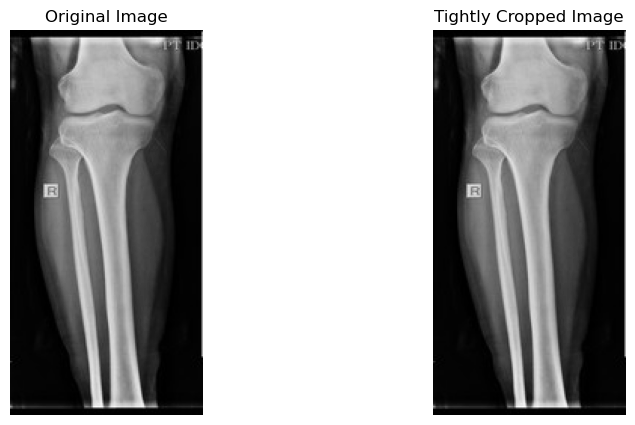

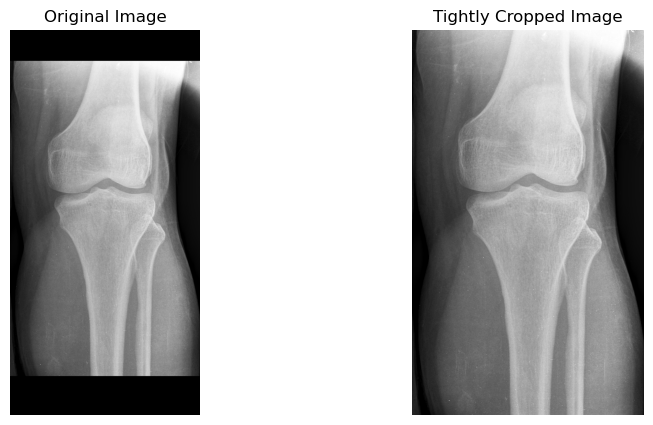

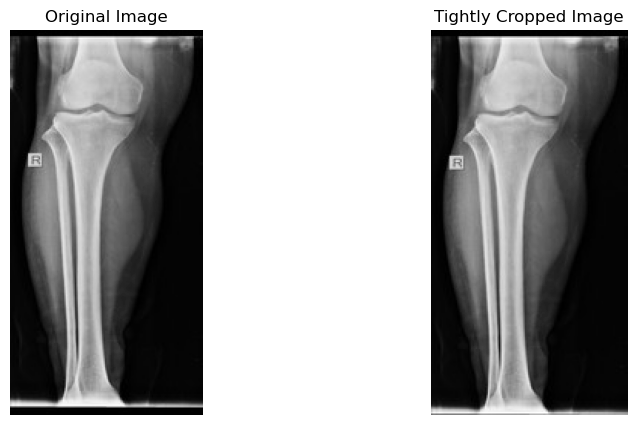

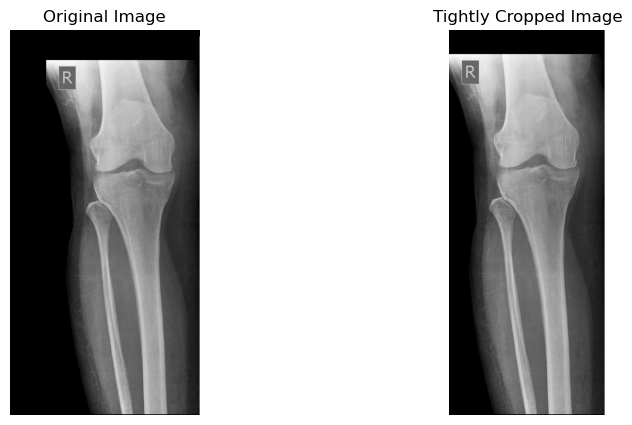

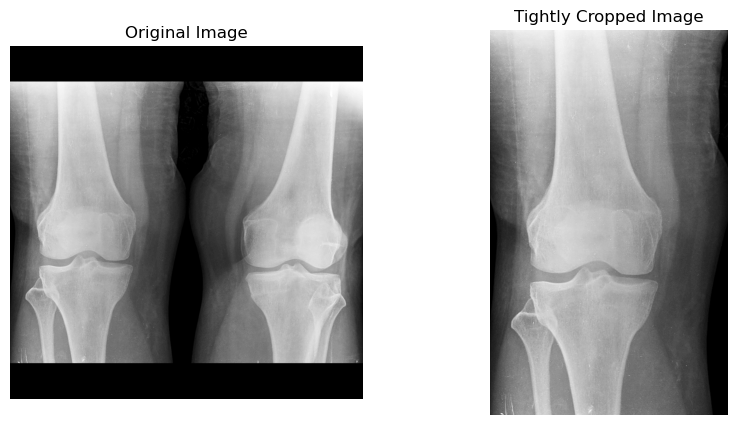

In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Base path to dataset
base_path = "/Users/gideonbonwitt/.cache/kagglehub/datasets/mohamedgobara/multi-class-knee-osteoporosis-x-ray-dataset/versions/1/OS Collected Data"

# Number of images to display
max_images_to_display = 5
displayed_images = 0

for cls in ["Normal", "Osteopenia", "Osteoporosis"]:
    folder_path = os.path.join(base_path, cls)

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            # Read the image in grayscale
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Error reading {img_path}")
                continue

            # Apply binary thresholding
            _, binary = cv2.threshold(img, 30, 255, cv2.THRESH_BINARY)

            # Perform morphological operations
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
            binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)

            # Find contours
            contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Get bounding box of the largest contour
            if contours:
                largest_contour = max(contours, key=cv2.contourArea)
                x, y, w, h = cv2.boundingRect(largest_contour)

                # Crop the image
                cropped_img = img[y:y+h, x:x+w]

                # Display original and cropped images
                plt.figure(figsize=(10, 5))
                plt.subplot(1, 2, 1)
                plt.imshow(img, cmap="gray")
                plt.title("Original Image")
                plt.axis("off")

                plt.subplot(1, 2, 2)
                plt.imshow(cropped_img, cmap="gray")
                plt.title("Tightly Cropped Image")
                plt.axis("off")
                plt.show()

                displayed_images += 1
                if displayed_images >= max_images_to_display:
                    break

        except Exception as e:
            print(f"Error processing {img_path}: {e}")

    if displayed_images >= max_images_to_display:
        break